# Passive degrees of freedom



Passive dofs!

In [1]:
from blop.utils import prepare_re_env

%run -i $prepare_re_env.__file__ --db-type=temp

running iteration 1 / 1


Transient Scan ID: 1     Time: 2024-02-03 16:46:29
Persistent Unique Scan ID: '026b5810-9d2a-4343-8ea7-e4327f95f699'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |  brownian1 |         x3 |  brownian2 |
+-----------+------------+------------+------------+------------+------------+------------+
|         1 | 16:46:29.7 |      0.705 |      0.961 |     -0.050 |      0.000 |      0.067 |


|         2 | 16:46:30.3 |      1.356 |     -0.193 |     -0.174 |      0.000 |     -0.087 |


|         3 | 16:46:30.8 |     -0.272 |     -0.935 |     -0.220 |      0.000 |     -0.276 |


|         4 | 16:46:31.2 |     -2.121 |      0.451 |      0.426 |      0.000 |     -0.494 |


|         5 | 16:46:31.7 |     -2.636 |      2.343 |      0.635 |      0.000 |     -0.291 |


|         6 | 16:46:32.1 |     -4.224 |      3.639 |      0.737 |      0.000 |     -0.593 |


|         7 | 16:46:32.6 |     -0.980 |      4.271 |      0.661 |      0.000 |     -0.265 |


|         8 | 16:46:33.0 |      2.396 |      4.933 |      0.382 |      0.000 |      0.034 |


|         9 | 16:46:33.5 |      2.827 |      3.055 |     -0.050 |      0.000 |      0.284 |


|        10 | 16:46:33.9 |      4.033 |      1.598 |     -0.222 |      0.000 |      0.249 |


|        11 | 16:46:34.4 |      3.419 |     -2.051 |     -0.304 |      0.000 |      0.230 |


|        12 | 16:46:34.8 |      4.721 |     -3.218 |     -0.408 |      0.000 |      0.535 |


|        13 | 16:46:35.2 |      0.544 |     -3.835 |     -0.544 |      0.000 |      0.447 |


|        14 | 16:46:35.7 |     -1.628 |     -4.422 |     -0.323 |      0.000 |      0.776 |


|        15 | 16:46:36.1 |     -3.617 |     -2.549 |     -0.592 |      0.000 |      1.028 |


|        16 | 16:46:36.5 |     -4.522 |     -1.547 |     -0.458 |      0.000 |      1.066 |


+-----------+------------+------------+------------+------------+------------+------------+
generator list_scan ['026b5810'] (scan num: 1)


/usr/share/miniconda3/envs/blop-py3.10/lib/python3.10/site-packages/bluesky/callbacks/fitting.py:167: RuntimeWarning: invalid value encountered in scalar divide
  np.sum(input * grids[dir].astype(float), labels, index) / normalizer





trained model 'himmelblau' in 47 ms


('026b5810-9d2a-4343-8ea7-e4327f95f699',)

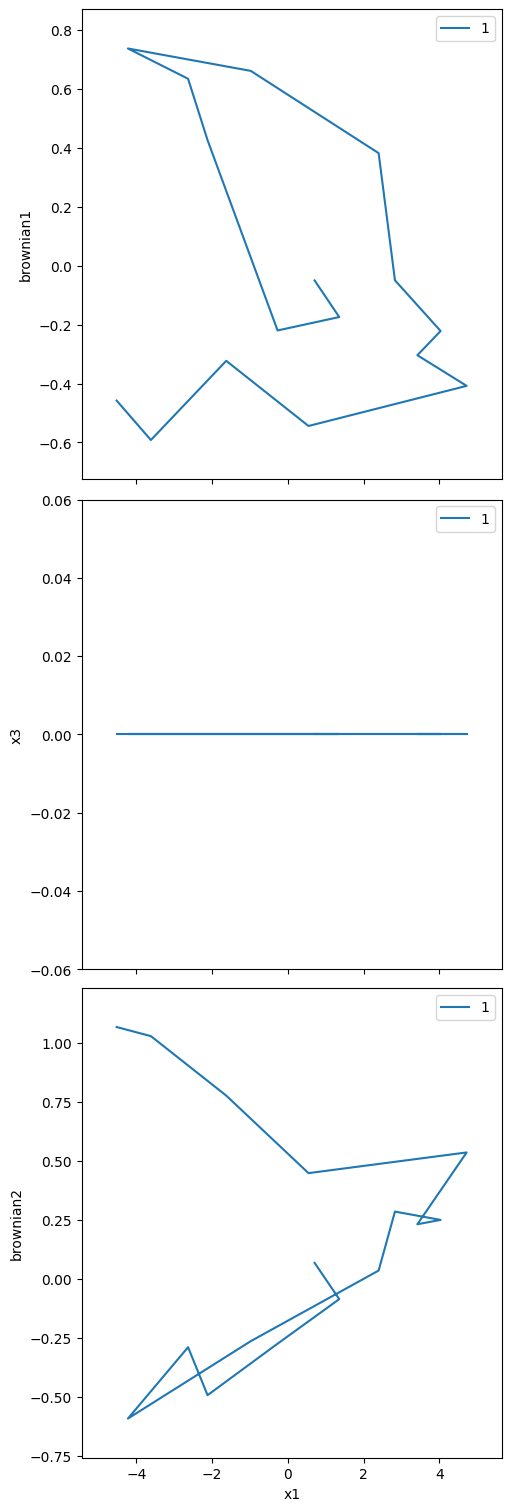

In [2]:
from blop.utils import functions
from blop import DOF, Agent, Objective
from blop.dofs import BrownianMotion


dofs = [
    DOF(name="x1", search_bounds=(-5.0, 5.0)),
    DOF(name="x2", search_bounds=(-5.0, 5.0)),
    DOF(name="x3", search_bounds=(-5.0, 5.0), active=False),
    DOF(device=BrownianMotion(name="brownian1"), read_only=True),
    DOF(device=BrownianMotion(name="brownian2"), read_only=True, active=False),
]

objectives = [
    Objective(name="himmelblau", target="min"),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=functions.constrained_himmelblau_digestion,
    db=db,
    verbose=True,
    tolerate_acquisition_errors=False,
)

RE(agent.learn("qr", n=16))

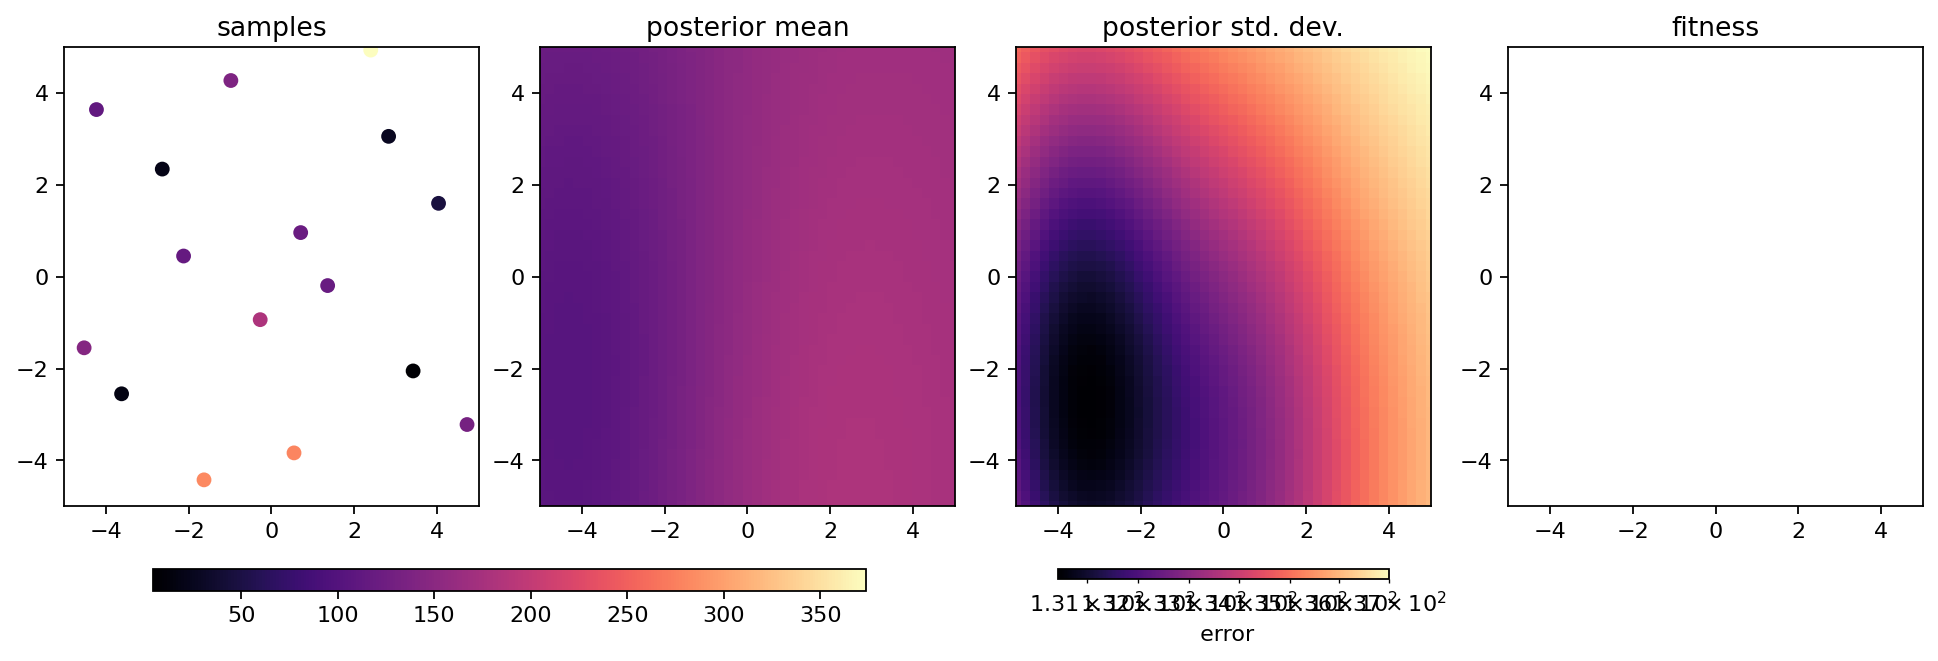

In [3]:
agent.plot_objectives()